# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv(r'C:\Users\DLL\Desktop\Data Science Data\loan_prediction_data.csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# number of rows and columns
loan_dataset.shape# statistical measures


(614, 13)

<AxesSubplot:>

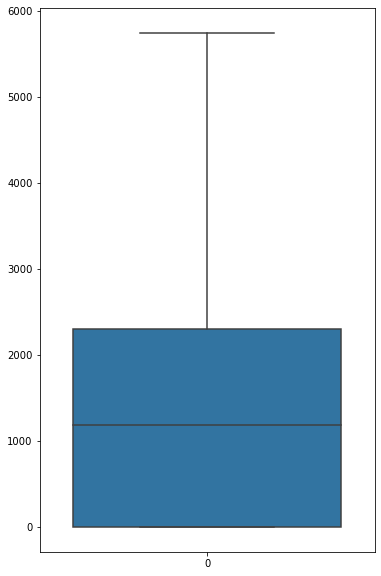

In [28]:
plt.figure(figsize=(6,10))
sns.boxplot(data=loan_dataset.CoapplicantIncome)

In [11]:
q1 = loan_dataset['ApplicantIncome'].quantile(0.25)
q3 = loan_dataset['ApplicantIncome'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

10171.25

In [13]:
loan_dataset['ApplicantIncome']=np.where(loan_dataset['ApplicantIncome'] > upper_limit,upper_limit,loan_dataset['ApplicantIncome'])

In [15]:
q1 = loan_dataset['CoapplicantIncome'].quantile(0.25)
q3 = loan_dataset['CoapplicantIncome'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

5743.125

In [17]:
loan_dataset['CoapplicantIncome']=np.where(loan_dataset['CoapplicantIncome'] > upper_limit,upper_limit,loan_dataset['CoapplicantIncome'])

In [18]:
q1 = loan_dataset['LoanAmount'].quantile(0.25)
q3 = loan_dataset['LoanAmount'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

270.0

In [19]:
loan_dataset['LoanAmount']=np.where(loan_dataset['LoanAmount'] > upper_limit,upper_limit,loan_dataset['LoanAmount'])

In [20]:
q1 = loan_dataset['Loan_Amount_Term'].quantile(0.25)
q3 = loan_dataset['Loan_Amount_Term'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

360.0

In [21]:
loan_dataset['Loan_Amount_Term']=np.where(loan_dataset['Loan_Amount_Term'] > upper_limit,upper_limit,loan_dataset['Loan_Amount_Term'])

In [23]:
q1 = loan_dataset['Credit_History'].quantile(0.25)
q3 = loan_dataset['Credit_History'].quantile(0.75)
iqr = q3-q1 #Interquartile range

upper_limit = q3+1.5*iqr 
upper_limit

1.0

In [24]:
loan_dataset['Credit_History']=np.where(loan_dataset['Credit_History'] > upper_limit,upper_limit,loan_dataset['Credit_History'])

In [8]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [11]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [13]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [14]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [15]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [16]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [17]:
# dependent values
loan_dataset['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

NameError: name 'plt' is not defined

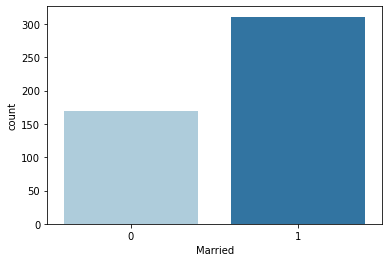

In [33]:
sns.countplot(x="Married", data=loan_dataset, palette="Paired")
plt.show()


<AxesSubplot:>

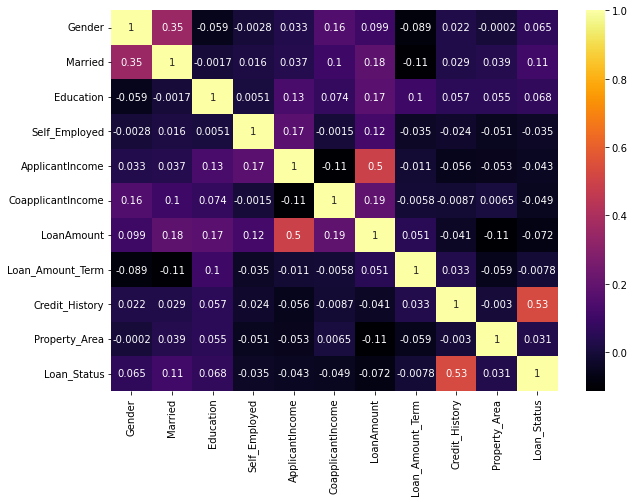

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(loan_dataset.corr(), annot=True, cmap='inferno')

In [ ]:
 There is positive correlation between Loan Amount and Applicant Income

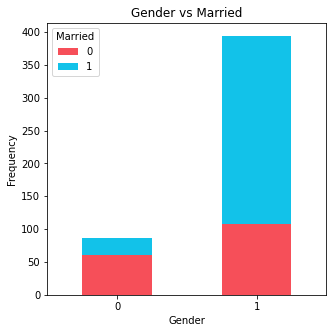

In [38]:
pd.crosstab(loan_dataset.Gender,loan_dataset.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [ ]:
Most male applicants are already married compared to female applicants. Also, the number of not married male applicants are higher compare to female applicants that had not married

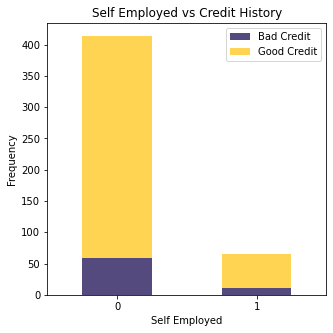

In [39]:
pd.crosstab(loan_dataset.Self_Employed,loan_dataset.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

Most not self employed applicants have good credit compared to self employed applicants

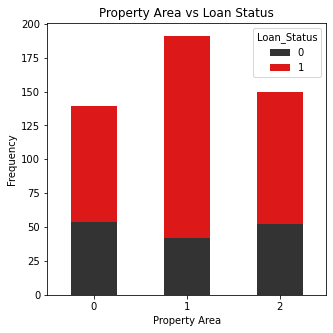

In [40]:
pd.crosstab(loan_dataset.Property_Area,loan_dataset.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

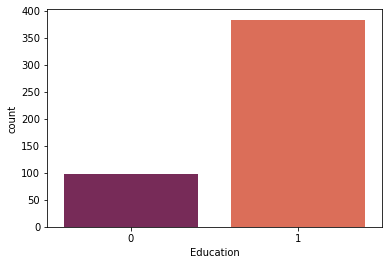

In [42]:
sns.countplot(x="Education", data=loan_dataset, palette="rocket")
plt.show()

In [29]:
loan_dataset['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

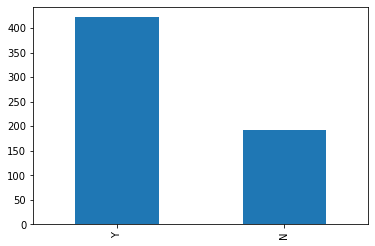

In [30]:
loan_dataset['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:title={'center':'Credit_History'}>

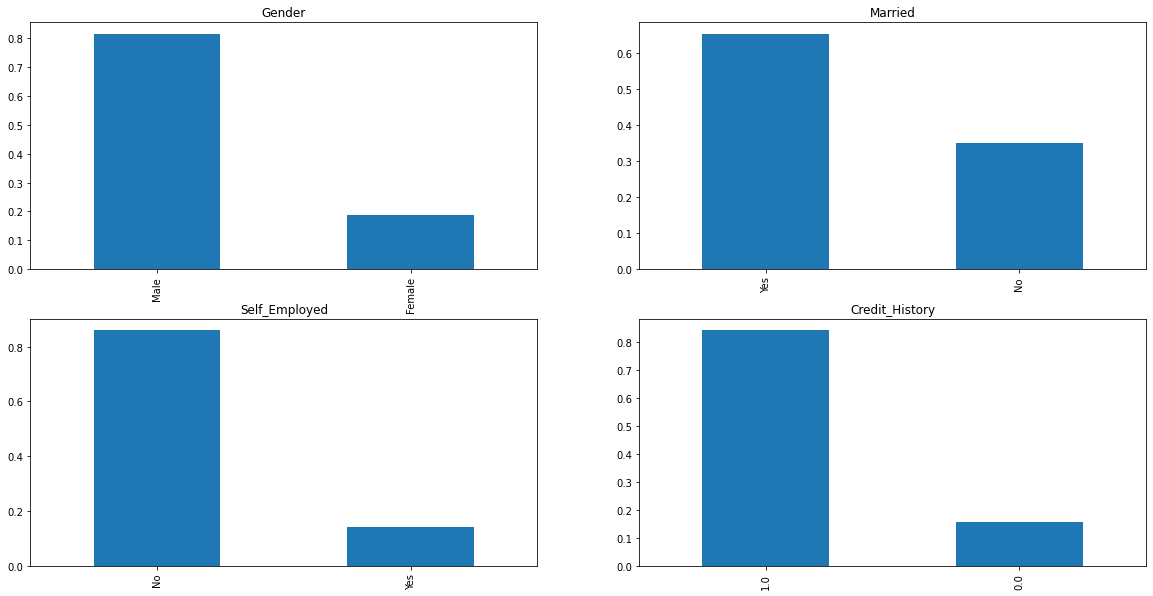

In [36]:
plt.subplot(221)
loan_dataset['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
loan_dataset['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married')
plt.subplot(223)
loan_dataset['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
loan_dataset['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

<AxesSubplot:title={'center':'Property_Area'}>

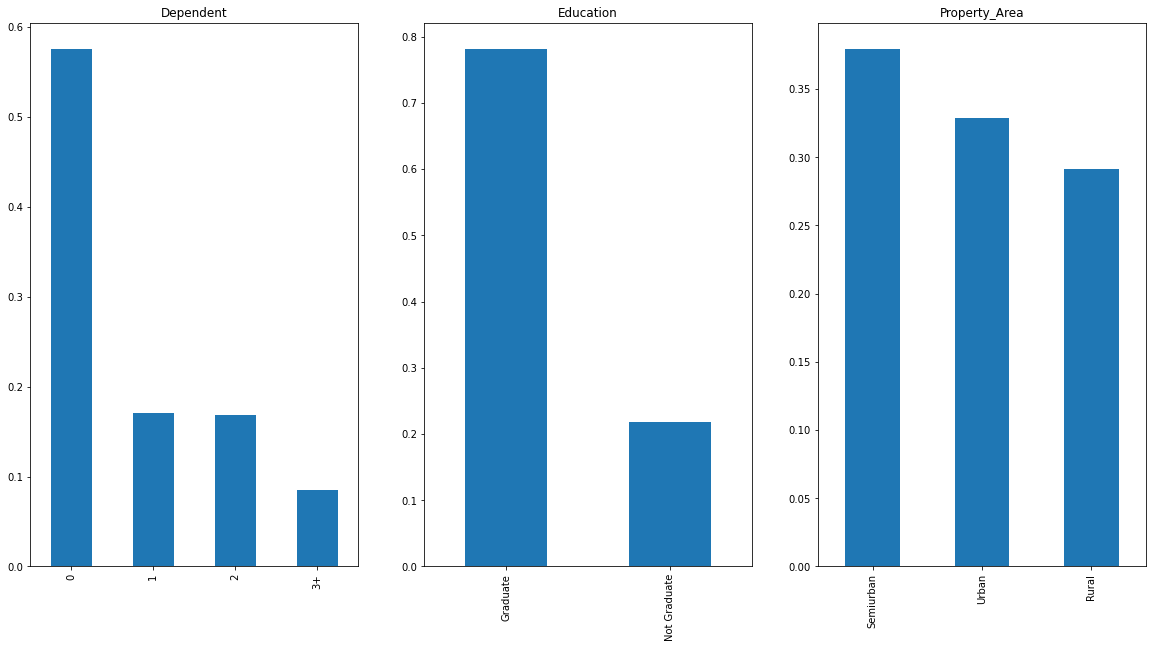

In [38]:
plt.subplot(131)
loan_dataset['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Dependent')
plt.subplot(132)
loan_dataset['Education'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Education')
plt.subplot(133)
loan_dataset['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

<AxesSubplot:xlabel='Gender'>

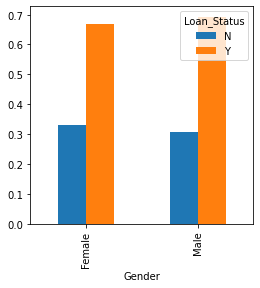

In [40]:
Gender=pd.crosstab(loan_dataset['Gender'],loan_dataset['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4))

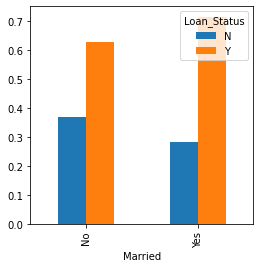

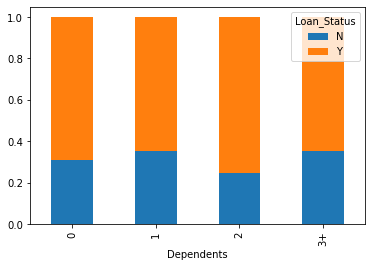

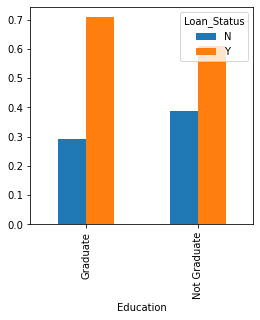

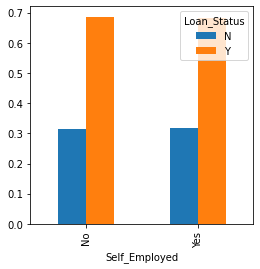

In [43]:
Married=pd.crosstab(loan_dataset['Married'],loan_dataset['Loan_Status']) 
Dependents=pd.crosstab(loan_dataset['Dependents'],loan_dataset['Loan_Status']) 
Education=pd.crosstab(loan_dataset['Education'],loan_dataset['Loan_Status']) 
Self_Employed=pd.crosstab(loan_dataset['Self_Employed'],loan_dataset['Loan_Status']) 
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show() 
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(4,4)) 
plt.show() 
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",figsize=(4,4))
plt.show()

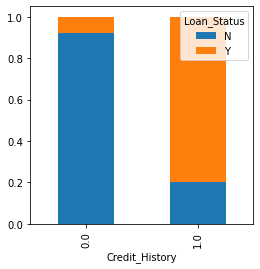

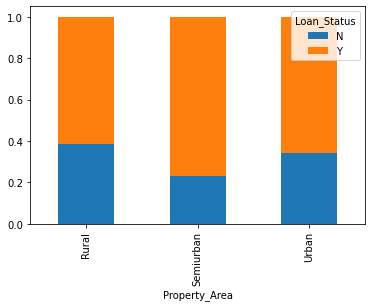

In [44]:
Credit_History=pd.crosstab(loan_dataset['Credit_History'],loan_dataset['Loan_Status']) 
Property_Area=pd.crosstab(loan_dataset['Property_Area'],loan_dataset['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

<AxesSubplot:xlabel='Education', ylabel='count'>

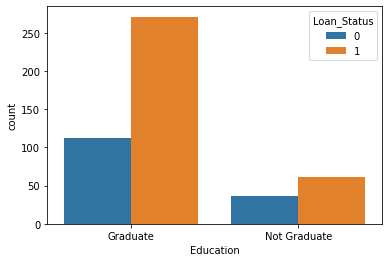

In [18]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

<AxesSubplot:xlabel='Married', ylabel='count'>

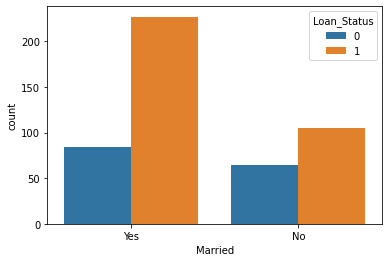

In [19]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

In [20]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [21]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [22]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = loan_dataset['Loan_Status']

In [23]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [24]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [26]:
classifier = svm.SVC(kernel='linear')

In [27]:
#training the support Vector Macine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [28]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)

In [29]:
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7986111111111112


In [30]:
# accuracy score on training data
X_test_prediction = classifier.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)

In [31]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8333333333333334
